# 2 Week : Optimization 과제

# Q1. Optimizer 실습

- 수업에서 배운 Optimizer를 직접 구현을 해보는 것을 목표로 합니다
- Q1은 크게 두가지 파트로 나뉘어져 있습니다.
- 1. $f(x,y)$를 미분한 $∇f(x,y)$를 찾기 2. 각 optimizer 구현하기
- 각 코드를 구현 후 시각화 코드를 입력해놓았으니 그대로 출력 하시면 됩니다
//
* 유의사항 : 시각화를 위해 결과의 형식을 지정해놓았습니다. 이와 다르게 하시면 출력이 제대로 안 될 수 있으니 이에 맞게 지정해주세요 :)


## Q1.1 $\nabla f(x,y)$를 구해주세요

✨유의사항 : np.array$([ \nabla_x f(x,y),\nabla_y f(x,y)])$ 형태로 return 해주세요  

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# 함수를 정의
def f(x, y):
    return -x**2 + y**2

# 그래디언트 정의
def grad_f(x, y):
    dx =
    dy =
    return np.array([  dx   ,     dy   ])


∇f(x,y) = np.array([
    -2*x,
    2*y
])

# 그래디언트 벡터 ∇f(x, y):
# ∇f(x,y) = [ -2x , 2y ]


In [2]:
import numpy as np

# 함수를 정의
def f(x, y):
    return -x**2 + y**2

# 그래디언트 정의
def grad_f(x, y):
    dx = -2 * x
    dy = 2 * y
    return np.array([dx, dy])


## Q1.2 각 Optimizer를 구현해주세요

- **SGD**: $\theta_{t+1} = \theta_t - \eta\cdot \nabla f(\theta_t)$

- **Momentum**:
    - $v_t = \gamma \cdot v_{t-1} + \eta \cdot\nabla f(\theta_t)$
    - **파라미터 업데이트** :  $\theta_{t+1} = \theta_t - v_t$

- **RMSprop**:
    - $g_t = \rho \cdot g_{t-1} + (1-\rho)\cdot g_t$
   
    - **파라미터 업데이트** :  $\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}} \nabla f(\theta_t)$

- **Adam**:
    - $m_t = \beta_1 m_{t-1} + (1 - \beta_1) \nabla f(\theta_t)$
    - $v_t = \beta_2 v_{t-1} + (1 - \beta_2) (\nabla f(\theta_t))^2$
    - $\hat{m}_t = \frac{m_t}{1 - \beta_1^t}$
    - $\hat{v}_t = \frac{v_t}{1 - \beta_2^t}$
    - **파라미터 업데이트** :  $\theta_{t+1} = \theta_t - \frac{\eta \hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}$





✨ 유의사항 :


1. 각 코드에서 ***어떤 파트인지 주석***으로 적어주세요 \\
ex) \\
`theta = theta + update  ## 파라미터 업데이트 항` \\
`momentum = ~~~~ ## momentum 항`
2.   각 함수의 return은 update 된 ***x,y***로 넣어주세요 \\
`ex) return x - lr * gradient , y - lr * gradient`
3.   lr / rho / beta 와 같은 각 값은 ***최대한 건들이지 말아주세요***. \\
시각화 하기에 좋은 파라미터로 맞춰놔서 시각화가 이상해질수도 있어요 :(
4. 정 모르시겠다면 Q2. 에 SGD 구현 예시를 해놓았습니다. Q2 처럼 해주시면 됩니다

In [39]:
def sgd(x, y, lr=0.1):

    grad_x, grad_y = grad_f(x, y)
    
    # 파라미터 업데이트 항
    x_update = x - lr * grad_x
    y_update = y - lr * grad_y
    
    return x_update, y_update
    

def momentum(x, y, lr=0.1, momentum=0.001):

    # 초기화 (모멘텀 항)
    if 'v_x' not in momentum.__dict__:
        momentum.v_x = 0
        momentum.v_y = 0
    
    # Gradient 계산
    grad_x, grad_y = grad_f(x, y)
    
    # 모멘텀 항
    momentum.v_x = momentum * momentum.v_x + lr * grad_x
    momentum.v_y = momentum * momentum.v_y + lr * grad_y
    
    # 파라미터 업데이트 항
    x_update = x - momentum.v_x
    y_update = y - momentum.v_y
    
    return x_update, y_update


def rmsprop(x, y, lr=0.1, rho=0.9, epsilon=1e-6):
    # 초기화 (RMSprop 항)
    if 'g_x' not in rmsprop.__dict__:
        rmsprop.g_x = 0
        rmsprop.g_y = 0
    
    # Gradient 계산
    grad_x, grad_y = grad_f(x, y)
    
    # RMSprop 항
    rmsprop.g_x = rho * rmsprop.g_x + (1 - rho) * grad_x**2
    rmsprop.g_y = rho * rmsprop.g_y + (1 - rho) * grad_y**2
    
    # 파라미터 업데이트 항
    x_update = x - (lr / np.sqrt(rmsprop.g_x + epsilon)) * grad_x
    y_update = y - (lr / np.sqrt(rmsprop.g_y + epsilon)) * grad_y
    
    return x_update, y_update


    

def adam(x, y, lr=0.1, beta1=0.9, beta2=0.9, epsilon=1e-8):
    # 초기화 (Adam 항)
    if 'm_x' not in adam.__dict__:
        adam.m_x = 0
        adam.m_y = 0
        adam.v_x = 0
        adam.v_y = 0
        adam.t = 0
    
    # Gradient 계산
    grad_x, grad_y = grad_f(x, y)
    
    # 시간 스텝 증가
    adam.t += 1
    
    # 1st moment 계산
    adam.m_x = beta1 * adam.m_x + (1 - beta1) * grad_x
    adam.m_y = beta1 * adam.m_y + (1 - beta1) * grad_y
    
    # 2nd moment 계산
    adam.v_x = beta2 * adam.v_x + (1 - beta2) * grad_x**2
    adam.v_y = beta2 * adam.v_y + (1 - beta2) * grad_y**2
    
    # Bias correction
    m_hat_x = adam.m_x / (1 - beta1**adam.t)
    m_hat_y = adam.m_y / (1 - beta1**adam.t)
    v_hat_x = adam.v_x / (1 - beta2**adam.t)
    v_hat_y = adam.v_y / (1 - beta2**adam.t)
    
    # 파라미터 업데이트 항
    x_update = x - (lr * m_hat_x) / (np.sqrt(v_hat_x) + epsilon)
    y_update = y - (lr * m_hat_y) / (np.sqrt(v_hat_y) + epsilon)
    
    return x_update, y_update

    


## Q1.3 시각화를 통한 특성 파악

- 어떤 Optimizer가 좋은지에 대한 정답은 없습니다.
- 그냥 결과를 보시고 각 Optimizer가 학습된 특성을 적어주세요 ex) 기울기를 착실하게 따라간다.



✨유의사항

- Momentum / RMSprop / Adam의 초기파라미터 v,g,m 및 t 도 0으로 맞춰주세요 ( 사용자가 짠 코드에 따라 변수명은 달라져도 됩니다)
- 다르게 나올 경우 예시와 같은 사진으로 최대한 맞춰주세요 :)






================================================================================

***Answer)***



SGD : 
1. 기울기를 따라 이동하여,학습 과정에서 진동이 발생할 수 있음
2. 단순하고, 직관적이지만, 노이즈로 인해 최적점에 도달하는 속도가 느릴 수 있음
    

Momentum : 
1. 모멘텀 항을 이용하여 학습속도를 가속화함.
2. 초기에는 느리게 움직이지만, 점차 가속되며 수렴 속도가 증가함.
3. 최적점 근처에서는 진동이 줄어들며 안정적인 수렴이 가능함.

RMSProp : 
1. 학습속도가 빠르고 진동이 적어 안정적인 수렵을 보여줌
2. 학습률을 각 파라미터에 따라 조절하여 학습을 진행하며, 기울기가 큰 곳에서는 학습률을 낮추고, 작음 곳에서는 학습률을 높이는 방식으로 효율적으로 학습함.

Adam : 
1. 모멘텀과 RMSProp의 장점을 결합한 방식으로 학습 초기부터 빠르게 수렴하며 안정적인 결과를 도출함. 특히, 노이즈가 많은 환경에서도 효과적으로 학습을 진행할 수 있어 다양한 상황에서 유용함

================================================================================

In [ ]:
# 시각화 전 초기 파라미터 세팅하기 (예시)
# Momentum, RMSprop, Adam 알고리즘을 위한 변수 초기화 - 모두 0으로 초기화시켜주세요
v = np.array([0.0, 0.0])
g = np.array([0.0, 0.0])
m = np.array([0.0, 0.0])
t = 0

<ipython-input-39-65fe7e6dfc7a>:28: RuntimeWarning: invalid value encountered in sqrt
  y = y - lr * m_hat[1] / (np.sqrt(v_hat[1]) + epsilon)


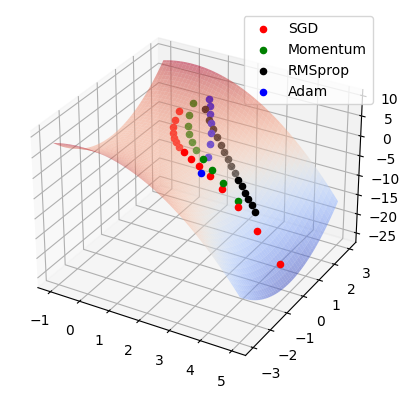

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = np.linspace(-1., 5, 100)
Y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)
ax.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.5,zorder=0)

# 초기 시작점을 설정
points = {
    'SGD': [0.3, 2],
    'Momentum': [0.5, 2.5],
    'RMSprop': [0.7, 2.3],
    'Adam': [0.9, 2.4]
}


# 각 알고리즘의 색상을 설정
colors = {'SGD': 'red', 'Momentum': 'green', 'RMSprop': 'black', 'Adam': 'blue'}

# 각 알고리즘을 실행하고 결과를 플롯에 추가합니다.
steps = 15
for step in range(steps):
    for key, (x, y) in points.items():
        if key == 'SGD':
            x, y = sgd(x, y)
        elif key == 'Momentum':
            x, y = momentum(x, y)
        elif key == 'RMSprop':
            x, y = rmsprop(x, y)
        elif key == 'Adam':
            x, y = adam(x, y)
        points[key] = [x, y]
        ax.scatter(x, y, f(x, y), color=colors[key], label=key if step == 0 else "")

# 범례 추가
ax.legend()
plt.show()

#Q2. Learning Rate

- Learning Rate의 효과에 대해 알아봅니다
- 여러 local minimum이 있는 함수에 갇히지 않고 global minimum로 갈 수 있는 learning rate를 찾는 것을 목표로 합니다.

## Q2.1 $\nabla f(x,y)$를 구해주세요

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function with local and global minima
def f(x, y):
    return (x**2 + y**2 - 1)**2 + 1 * np.sin(5 * x) + 1 * np.sin(5 * y)

# Define the gradients
def grad_f(x, y):
    dx = 4 * x * (x**2 + y**2 - 1) + 5 * np.cos(5 * x)
    dy = 4 * y * (x**2 + y**2 - 1) + 5 * np.cos(5 * y)
    return np.array([dx, dy])


## Q2.2 적절한 learning rate를 찾아주세요

### learning_rate를 정해주세요

- 범위는 (0.0001~0.05) 입니다.
- learning_rate는 최대 세 개까지 넣을 수 있게 해놨습니다.
- 위 범위에서 50에포크동안 local minimum에 빠지지 않고 global minimum로 가는 learning rate를 코드 실행 / 시각화를 통해 찾아주세요
- global minimum으로 가는 learning_rate 중 가장 작은 learning rate를 적어주세요




================================================================================

***최적의 learning_rate***  : 0.001

================================================================================

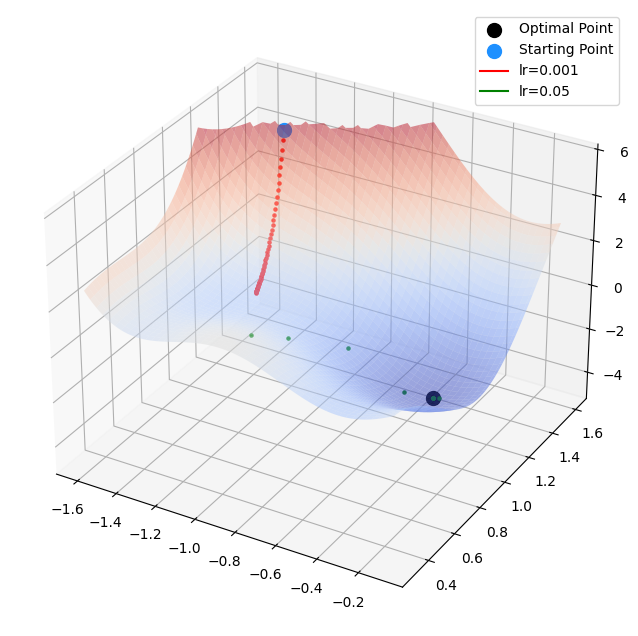

In [90]:

learning_rates = [0.001, 0.05]




# =================================================
# 시각화 세팅 파트 (그냥 실행시켜주시면 됩니다) ===
# =================================================
# Gradient Descent Algorithm (SGD)
def sgd(x, y, lr=0.1):
    grad = grad_f(x, y)
    return x - lr * grad[0], y - lr * grad[1]

# Initialize the plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
X = np.linspace(-1.6, -0.1, 100)
Y = np.linspace(0.3, 1.6, 100)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)
# Set the z-axis limit
zlim_min, zlim_max = -5, 6
ax.set_zlim(zlim_min, zlim_max)

# Mask Z values outside the zlim range
Z = np.where((Z >= zlim_min) & (Z <= zlim_max), Z, np.nan)

ax.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.5, zorder=0)

ax.scatter(-0.3146579, 0.94397367, f(0.94397367, -0.3146579), color='black', s=100, zorder=3, label='Optimal Point')
ax.scatter(-1.3, 1.3, f(-1.3, 1.3), color='dodgerblue', s=100, zorder=3, label='Starting Point')

# Initialize the points with slight variations
initial_points = [
    [-1.3, 1.3],
    [-1.25, 1.35],
    [-1.35, 1.25]
]

# Colors for different learning rates
colors = ['red', 'green', 'blue']
labels = [f'lr={lr}' for lr in learning_rates]

# ===============================================
# Optimizer 파트 , 에포크는 50으로 고정합니다 ===
# ===============================================

steps = 50
for lr, color, label, initial_point in zip(learning_rates, colors, labels, initial_points):
    x, y = initial_point

    for step in range(steps):
        x, y = sgd(x, y, lr)
        ax.scatter(x, y, f(x, y), color=color, s=5, zorder=4)
    ax.plot([], [], color=color, label=label)

# Add legend
ax.set_zlim(-5, 6)
ax.legend()
plt.show()


## Q 2.3

### 위 실험을 통해 얻은 경험으로 learning_rate가 높을 때 / 낮을 때 장단점을 적어주세요 +추가로 탐색하여 적어주셔도 좋습니다

### 학습률(learning rate)이 높은 경우

**장점**:
1. **빠른 수렴**: 학습률이 높으면 기울기 업데이트가 더 크게 이루어지므로, 이론적으로 수렴 속도가 빨라질 수 있음. 이는 특히 초기 학습 단계에서 빠르게 최적화가 이루어질 수 있음을 의미함.

2. **단순화된 탐색**: 큰 스텝 사이즈로 인해 파라미터 공간을 더 넓게 탐색할 수 있으며, 이는 로컬 미니마를 피할 가능성을 높일 수 있음.

**단점**:
1. **발산 위험**: 너무 높은 학습률은 손실 함수의 최적점을 지나쳐서 발산할 수 있는 위험이 있음. 이는 모델이 최적의 파라미터를 찾지 못하고 점점 더 나빠지는 결과를 초래할 수 있음.

2. **불안정한 수렴**: 손실이 줄어들기보다는 불규칙하게 변하거나, 수렴하지 않고 진동하는 현상이 발생할 수 있음. 학습률이 높으면 경량화 과정이 불안정해질 수 있음.

### 학습률이 낮은 경우

**장점**:
1. **안정적인 수렴**: 낮은 학습률은 업데이트가 작기 때문에 기울기 소멸에 의해 안정적으로 수렴할 수 있음. 이는 모델이 최적의 파라미터에 근접하게 됨.

2. **정밀한 탐색**: 작은 스텝 사이즈로 인해 손실 함수의 최소값에 더 정밀하게 접근할 수 있으며, 더 세밀하게 최적의 파라미터를 찾을 수 있음.

**단점**:
1. **느린 수렴**: 낮은 학습률은 업데이트가 작아 학습 속도가 느릴 수 있음. 이로 인해 많은 에포크가 필요하여 학습 시간이 길어질 수 있음.

2. **로컬 미니마 문제**: 낮은 학습률은 로컬 미니마에 빠질 가능성이 높아질 수 있으며, 최적의 해를 찾지 못할 수도 있음. 특히, 복잡한 손실 함수에서는 전역 최적점을 찾기 어려움.

### 결론

- **높은 학습률**: 빠른 수렴과 넓은 탐색 범위가 장점이지만, 발산과 불안정한 수렴이 단점임. 일반적으로 높은 학습률은 초기 단계에서 효과적일 수 있지만, 최적화가 진행됨에 따라 학습률을 낮추는 것이 좋음.

- **낮은 학습률**: 안정적이고 정밀한 수렴이 가능하지만, 학습 속도가 느리고 로컬 미니마에 빠질 수 있음. 복잡한 모델에서는 학습률 스케줄링을 통해 초기에는 높은 학습률을 사용하고, 이후에는 낮추는 방법이 효과적일 수 있음.

이와 같은 실험과 분석을 통해 적절한 학습률을 선택하고 조정하는 것이 모델 훈련의 성공에 중요한 요소임을 알 수 있음.